## Principal Component Analysis (Slovakian Dataset)
Source: https://www.sciencedirect.com/science/article/pii/S2352340924005031?ref=pdf_download&fr=RR-2&rr=926fc0a2699bbecd

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis
from scipy.spatial.distance import cdist

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Reading Slovakian Dataset

In [166]:
# Load Data
df = pd.read_csv('raw_data/SlovakiaDataset.csv')

# Create new DataFrame with selected features
data_new = pd.DataFrame()

data_new['Gender'] = df['Gender']
data_new['FootLength'] = df['25.Foot lenght (cm)']
data_new['LowerLegLength'] = df['16.Knee height, sitting (cm)']
data_new['ThighLength'] = df['19.Buttock-knee length (cm)']
data_new['TorsoHeight'] = df['14.Elbow height, sitting (cm)'] + df['15.Shoulder-elbow length (cm)']
data_new['UpperArmLength'] = df['15.Shoulder-elbow length (cm)']
data_new['ForearmLength'] = df['18.Forearm-fingertip length  (cm)']

# Drop NaN values
data_new.dropna(inplace=True)

male_data = data_new[data_new['Gender'] == 'M']*10
female_data = data_new[data_new['Gender'] == 'F']*10

# male_data.describe()

In [167]:
dfm = pd.read_csv(r'raw_data/SlovakiaDataset_Stats_M.csv', )
dfm = dfm.set_index('Male respondents').transpose()

df_male = pd.DataFrame()
df_male['FootLength'] = dfm['25.Foot lenght (cm)']
df_male['LowerLegLength'] = dfm['16.Knee height in sitting position (cm)']
df_male['ThighLength'] = dfm['19.Thigh length in sitting position at knee bend (cm)']
df_male['TorsoHeight'] = dfm['14.Elbow height in sitting position (cm)'] + dfm['15.Height of the upper arm when flexed at the elbow (cm)']
df_male['UpperArmLength'] = dfm['15.Height of the upper arm when flexed at the elbow (cm)']
df_male['ForearmLength'] = dfm['18.The length of the forearm and hand at the elbow bend  (cm)']

dfw = pd.read_csv(r'raw_data/SlovakiaDataset_Stats_F.csv', )
dfw = dfw.set_index('Female respondents').transpose()

df_female = pd.DataFrame()
df_female['FootLength'] = dfw['25.Foot lenght (cm)']
df_female['LowerLegLength'] = dfw['16.Knee height in sitting position (cm)']
df_female['ThighLength'] = dfw['19.Thigh length in sitting position at knee bend (cm)']
df_female['TorsoHeight'] = dfw['14.Elbow height in sitting position (cm)'] + dfm['15.Height of the upper arm when flexed at the elbow (cm)']
df_female['UpperArmLength'] = dfw['15.Height of the upper arm when flexed at the elbow (cm)']
df_female['ForearmLength'] = dfw['18.The length of the forearm and hand at the elbow bend  (cm)']

In [168]:
dimensions = ['FootLength','LowerLegLength','ThighLength','TorsoHeight','UpperArmLength','ForearmLength']
mean = 'Mean'
sd = 'Std. Deviation'

slovakia_stats = pd.DataFrame()

for column in dimensions:
    mean_value = ((df_male[column][mean] + df_female[column][mean]) / 2 ) * 10
    sd_value = np.sqrt((df_male[column][mean]**2 + df_female[column][mean]**2) / 4)
    
    slovakia_stats.at[mean, column] = mean_value
    slovakia_stats.at[sd, column] = sd_value
 
slovakia_stats

,FootLength,LowerLegLength,ThighLength,TorsoHeight,UpperArmLength,ForearmLength
Mean,257.520000,543.952500,569.17400,668.029500,369.16200,458.450500
Std. Deviation,18.237271,38.498054,40.26526,47.242308,26.12837,32.447971


### Reading AdultData PCA Dataset

In [169]:
df = pd.read_csv(r'raw_data/adultdata_data.csv')
df = df.set_index('Dimension').transpose()

adult_data = pd.DataFrame()
adult_data['FootLength'] = df['(242)FootLength']
adult_data['LowerLegLength'] = df['(230)TopOfKneeHeight']
adult_data['ThighLength'] = df['(215)ButtockToKnee']
adult_data['TorsoHeight'] = df['(61)Mid-ShoulderHeight']
adult_data['UpperArmLength'] = df['(112)ShoulderToElbow']
adult_data['ForearmLength'] = df['(124)ElbowToTipOfMiddleFinger']

adult_data.head()

,FootLength,LowerLegLength,ThighLength,TorsoHeight,UpperArmLength,ForearmLength
Man5,245.3,497.8,552.2,585.7,346.6,442.0
Man50,266.8,544.4,612.6,634.7,376.7,477.0
Man95,288.2,591.1,673.0,683.8,406.7,512.1
Woman5,220.2,450.3,521.4,533.3,312.5,396.3
Woman50,241.1,493.9,588.9,580.2,341.5,431.1


In [170]:
adult_stats = adult_data.describe()

adult_stats

,FootLength,LowerLegLength,ThighLength,TorsoHeight,UpperArmLength,ForearmLength
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,253.950000,519.150000,600.750000,607.466667,359.100000,454.066667
std,23.594978,48.951272,58.739007,52.291210,32.696605,40.109583
min,220.200000,450.300000,521.400000,533.300000,312.500000,396.300000
25%,242.150000,494.875000,561.375000,581.575000,342.775000,433.825000
50%,253.700000,517.600000,600.750000,606.400000,358.600000,453.950000
75%,265.625000,542.650000,645.450000,632.800000,375.175000,474.225000
max,288.200000,591.100000,673.000000,683.800000,406.700000,512.100000


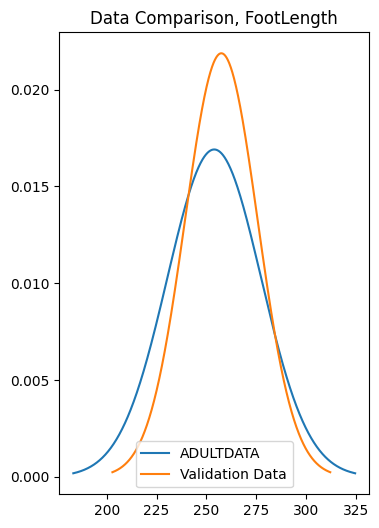

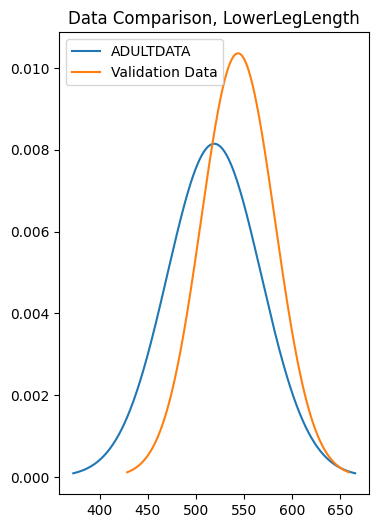

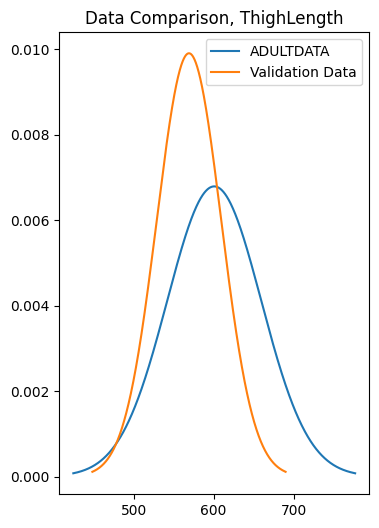

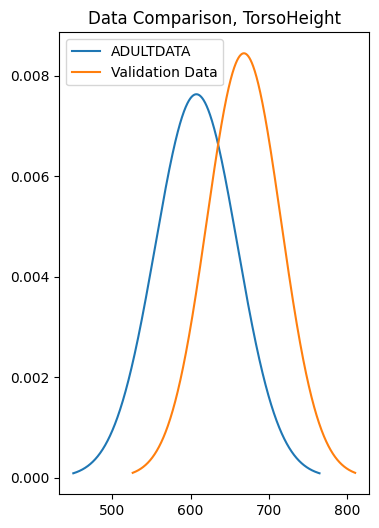

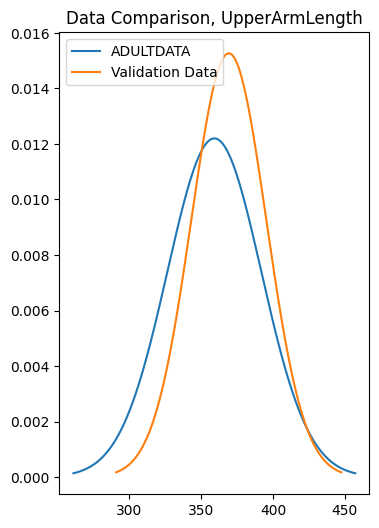

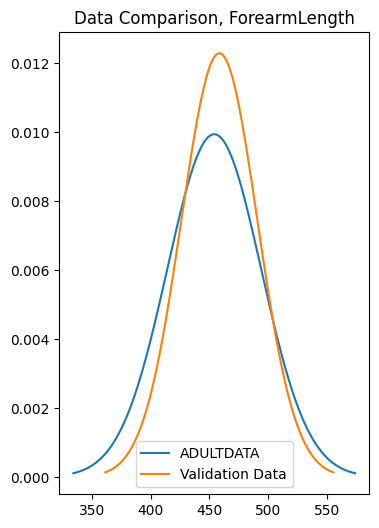

In [171]:
dimensions = ['FootLength','LowerLegLength','ThighLength','TorsoHeight','UpperArmLength','ForearmLength']

for dimension in dimensions:
    fig, ax = plt.subplots(figsize=(4, 6), dpi=100)

    adult_mean = adult_stats[f'{dimension}']['mean']
    adult_std = adult_stats[f'{dimension}']['std']

    x = np.linspace(adult_mean - 3*adult_std, adult_mean + 3*adult_std, 1000)
    y = stats.norm.pdf(x, adult_mean, adult_std)

    plt.plot(x,y, label=f'ADULTDATA')

    slovakia_mean = slovakia_stats[f'{dimension}']['Mean']
    slovakia_std = slovakia_stats[f'{dimension}']['Std. Deviation']
    sample = np.random.normal(slovakia_mean, slovakia_std, 1000)

    x = np.linspace(slovakia_mean - 3*slovakia_std, slovakia_mean + 3*slovakia_std, 1000)
    y = stats.norm.pdf(x, slovakia_mean, slovakia_std)

    # plt.hist(sample, bins=50, density=True, alpha=0.6, color='g', label=f'SD {dimension}')

    plt.plot(x,y, label=f'Validation Data')
    

    plt.title(f"Data Comparison, {dimension}")
    plt.legend()

### PCA Graph

In [172]:
adult_data = data_new.drop(columns = 'Gender')

# Scale data before applying PCA
scaling = StandardScaler()

# Use fit and transform method 
Scaled_data = scaling.fit_transform(adult_data)

# Set the n_components=2
pca = PCA(n_components=2)
x = pca.fit_transform(Scaled_data)

# Check the dimensions of data after PCA
print(x.shape)

# Store PCA results in a DataFrame
df_pca = pd.DataFrame(x, columns=['PC1', 'PC2'], index=data_new.index)

data_new['Gender_colour'] = data_new['Gender'].map({'M': 'tab:blue', 'F': 'tab:pink'})  # Convert to numeric

(4500, 2)


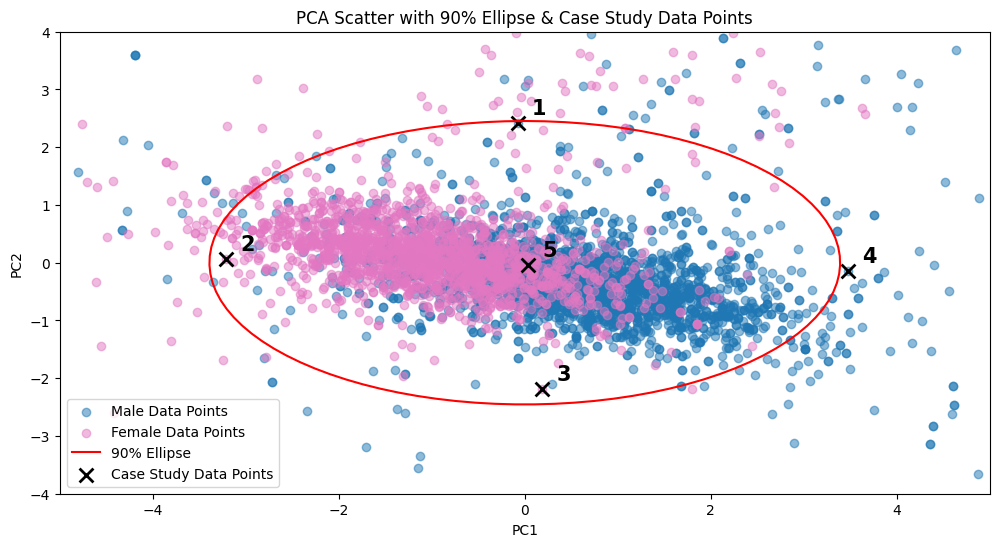

In [173]:
# Compute mean and covariance of PC1 & PC2
mean = df_pca.mean().values
cov = np.cov(df_pca.T)

# Compute Mahalanobis distance threshold for 90% confidence
chi2_threshold = chi2.ppf(0.90, df=2)  # 90% confidence level

# Eigen decomposition for ellipse fitting
eigvals, eigvecs = np.linalg.eigh(cov)  # Get eigenvalues and eigenvectors
ellipse_axes = np.sqrt(eigvals * chi2_threshold)  # Scale axes based on chi2 threshold

# Generate ellipse points
theta = np.linspace(0, 2 * np.pi, 100)
ellipse_x = mean[0] + ellipse_axes[0] * np.cos(theta) * eigvecs[0, 0] + ellipse_axes[1] * np.sin(theta) * eigvecs[0, 1]
ellipse_y = mean[1] + ellipse_axes[0] * np.cos(theta) * eigvecs[1, 0] + ellipse_axes[1] * np.sin(theta) * eigvecs[1, 1]

# Reorder the extreme points: Top (1), Left (2), Bottom (3), Right (4)
# Get indices corresponding to each direction
topmost_idx = np.argmax(ellipse_y)
leftmost_idx = np.argmin(ellipse_x)
bottommost_idx = np.argmin(ellipse_y)
rightmost_idx = np.argmax(ellipse_x)

extreme_ellipse_points = np.array([
    [ellipse_x[topmost_idx], ellipse_y[topmost_idx]],     # Top
    [ellipse_x[leftmost_idx], ellipse_y[leftmost_idx]],   # Left
    [ellipse_x[bottommost_idx], ellipse_y[bottommost_idx]], # Bottom
    [ellipse_x[rightmost_idx], ellipse_y[rightmost_idx]]  # Right
])

# Find closest data point to each
distances = cdist(df_pca[['PC1', 'PC2']], extreme_ellipse_points)
nearest_indices = np.argmin(distances, axis=0)
extreme_points = df_pca.iloc[nearest_indices]

# Label for plotting
extreme_labels = ['1', '2', '3', '4']

# Center point (5)
df_pca['Distance_to_Center'] = np.sqrt((df_pca['PC1'] - mean[0])**2 + (df_pca['PC2'] - mean[1])**2)
center_point_idx = df_pca['Distance_to_Center'].idxmin()
center_point = df_pca.loc[[center_point_idx]]
center_label = '5'

# Retrieve original data for extreme points
extreme_original_data = data_new.loc[extreme_points.index]
center_original_data = data_new.loc[center_point.index]

# Plot starts here
plt.figure(figsize=(12, 6))

# Male & Female scatter
plt.scatter(df_pca[data_new['Gender'] == 'M']['PC1'], df_pca[data_new['Gender'] == 'M']['PC2'], 
            c='tab:blue', alpha=0.5, label="Male Data Points")
plt.scatter(df_pca[data_new['Gender'] == 'F']['PC1'], df_pca[data_new['Gender'] == 'F']['PC2'], 
            c='tab:pink', alpha=0.5, label="Female Data Points")

# Ellipse
plt.plot(ellipse_x, ellipse_y, 'r', label="90% Ellipse")

# Plot all 5 characteristic points
all_x = np.append(extreme_points['PC1'].values, center_point['PC1'].values)
all_y = np.append(extreme_points['PC2'].values, center_point['PC2'].values)
plt.scatter(all_x, all_y, c='black', marker='x', s=100, linewidths=2, label="Case Study Data Points")

# Add text labels: 1-4 for extremes, 5 for center
for i, (x, y) in enumerate(zip(extreme_points['PC1'], extreme_points['PC2'])):
    plt.text(x + 0.15, y + 0.15, extreme_labels[i], fontsize=15, fontweight='bold')

# Add label for center point (5)
plt.text(center_point['PC1'].values[0] + 0.15, center_point['PC2'].values[0] + 0.15, center_label, fontsize=15, fontweight='bold')

# Axis range
plt.xlim(-5, 5)
plt.ylim(-4, 4)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title("PCA Scatter with 90% Ellipse & Case Study Data Points")
plt.show()

In [174]:
print("Extreme Points - Original Data:")
extreme_original_data

Extreme Points - Original Data:


,Gender,FootLength,LowerLegLength,ThighLength,TorsoHeight,UpperArmLength,ForearmLength,Gender_colour
9470,M,26.0,55.0,37.0,76.0,45.0,51.0,tab:blue
2115,F,20.0,46.0,57.0,50.0,30.0,39.0,tab:pink
5002,F,25.0,53.0,65.0,55.0,29.0,72.0,tab:pink
10090,M,27.0,67.0,68.0,79.0,46.0,54.0,tab:blue


In [175]:
print("\nClosest Point to Center - Original Data:")
center_original_data


Closest Point to Center - Original Data:


,Gender,FootLength,LowerLegLength,ThighLength,TorsoHeight,UpperArmLength,ForearmLength,Gender_colour
1720,M,25.0,56.0,60.0,61.5,39.0,44.0,tab:blue


In [176]:
# Get the PCA loadings (eigenvectors)
loadings = pd.DataFrame(pca.components_, columns=adult_data.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
loadings

,FootLength,LowerLegLength,ThighLength,TorsoHeight,UpperArmLength,ForearmLength
PC1,0.442478,0.453731,0.380935,0.416172,0.432171,0.305385
PC2,-0.269894,-0.322424,-0.356995,0.577406,0.548588,-0.247807


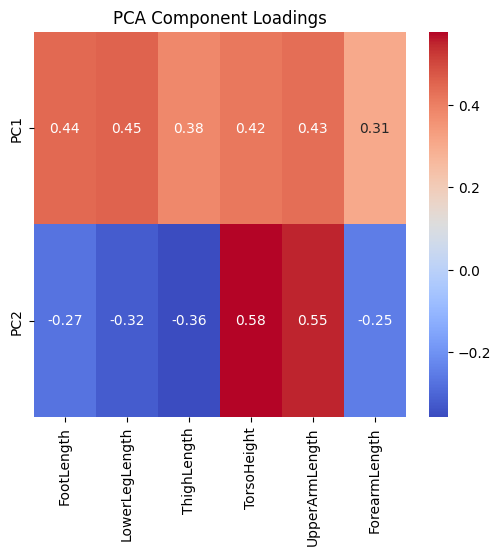

In [177]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("PCA Component Loadings")
plt.show()